In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np

In [2]:
URL='https://www.rottentomatoes.com/m/top_gun_maverick/reviews'

In [3]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
def scrapeUrl(URL):
  """ scrape data from url - give url as a parameter """
  page = urlopen(URL)
  html_bytes = page.read()
  html = html_bytes.decode("utf-8")
  #print(HTML)
  soup = BeautifulSoup(html, "html.parser")
  return soup   
def findReviews(soup):
  """ find reviews using class="the_review" """
  NoneType = type(None)
  reviews = []
  for element in soup.find_all("div"):
    i = element.get("class")
    if isinstance(i, NoneType) == False:
      if 'the_review' in i:
        reviews.append(element.text)
  dfrev = pd.DataFrame(reviews, columns= ['reviews'])
  return dfrev
  url='https://www.rottentomatoes.com/m/top_gun_maverick/reviews'
  sc = scrapeUrl(URL)
  t = findReviews(sc)
  print(t)

In [4]:
import pandas as pd
import requests
import re
import time

headers = {
    'Referer': 'https://www.rottentomatoes.com/m/notebook/reviews?type=user',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.108 Safari/537.36',
    'X-Requested-With': 'XMLHttpRequest',
}

s = requests.Session()
        
def get_reviews(url):
    r = requests.get(url)
    movie_id = re.findall(r'(?<=movieId":")(.*)(?=","type)',r.text)[0]

    api_url = f"https://www.rottentomatoes.com/napi/movie/{movie_id}/reviews/user" #use reviews/userfor user reviews
    
    payload = {
        'direction': 'next',
        'endCursor': '',
        'startCursor': '',
    }
    
    review_data = []
    count=0
    
    while True:
        r = s.get(api_url, headers=headers, params=payload)
        data = r.json()

        if not data['pageInfo']['hasNextPage']:
            break

        payload['endCursor'] = data['pageInfo']['endCursor']
        payload['startCursor'] = data['pageInfo']['startCursor'] if data['pageInfo'].get('startCursor') else ''

        review_data.extend(data['reviews'])
        time.sleep(2)
        count = count + 1
        if count > 500:
            break
    
    return review_data

data = get_reviews('https://www.rottentomatoes.com/m/top_gun_maverick/reviews')
df = pd.json_normalize(data)

In [5]:
df.shape

(5010, 14)

In [6]:
df.head()

,rating,review,displayName,isVerified,isSuperReviewer,hasSpoilers,hasProfanity,score,timeFromCreation,user.displayName,user.realm,user.userId,user.accountLink,displayImageUrl
0,5.0,Even better than the first!! Tom Cruise is inc...,Megan,True,False,False,False,5.0,1h ago,Megan,Fandango,f87be09d-0895-4259-9238-267c77d72263,NaN,NaN
1,5.0,"Tom Cruise was awesome, great movie with spect...",Rosemary Coffer,True,False,False,False,5.0,1h ago,Rosemary Coffer,Fandango,7C6246D8-AEA3-4C2B-9889-C548E021CA95,NaN,NaN
2,5.0,Didn't care for the moving seats,Dorothy M,True,False,False,False,5.0,1h ago,Dorothy M,Fandango,BD64860E-F69E-460A-8D90-8F07A8DA5B3E,NaN,NaN
3,5.0,Great story good acting. Filled with excitemen...,Top Gun,True,False,False,False,5.0,1h ago,Top Gun,Fandango,f5f9488d-4ebb-419a-b029-2351be6941f7,NaN,NaN
4,5.0,Best movie weve seen in quite awhile! Lots of ...,Roxanna,True,False,False,False,5.0,1h ago,Roxanna,Fandango,7c8f4c0f-3ecc-4b30-9ecb-5ab7c51da6a4,NaN,NaN


In [43]:
# Create new csv file for easy use

df.to_csv('data.csv')

In [2]:
data=pd.read_csv('data.csv')

In [3]:
data.head()

,Unnamed: 0,rating,review,displayName,isVerified,isSuperReviewer,hasSpoilers,hasProfanity,score,timeFromCreation,user.displayName,user.realm,user.userId,user.accountLink,displayImageUrl
0,0,5.0,Even better than the first!! Tom Cruise is inc...,Megan,True,False,False,False,5.0,1h ago,Megan,Fandango,f87be09d-0895-4259-9238-267c77d72263,NaN,NaN
1,1,5.0,"Tom Cruise was awesome, great movie with spect...",Rosemary Coffer,True,False,False,False,5.0,1h ago,Rosemary Coffer,Fandango,7C6246D8-AEA3-4C2B-9889-C548E021CA95,NaN,NaN
2,2,5.0,Didn't care for the moving seats,Dorothy M,True,False,False,False,5.0,1h ago,Dorothy M,Fandango,BD64860E-F69E-460A-8D90-8F07A8DA5B3E,NaN,NaN
3,3,5.0,Great story good acting. Filled with excitemen...,Top Gun,True,False,False,False,5.0,1h ago,Top Gun,Fandango,f5f9488d-4ebb-419a-b029-2351be6941f7,NaN,NaN
4,4,5.0,Best movie weve seen in quite awhile! Lots of ...,Roxanna,True,False,False,False,5.0,1h ago,Roxanna,Fandango,7c8f4c0f-3ecc-4b30-9ecb-5ab7c51da6a4,NaN,NaN


In [4]:
data.shape

(5010, 15)

In [5]:
data.columns

Index(['Unnamed: 0', 'rating', 'review', 'displayName', 'isVerified',
       'isSuperReviewer', 'hasSpoilers', 'hasProfanity', 'score',
       'timeFromCreation', 'user.displayName', 'user.realm', 'user.userId',
       'user.accountLink', 'displayImageUrl'],
      dtype='object')

In [6]:
# We needs only rating and review columns

data=data.drop(['Unnamed: 0','displayName', 'isVerified',
       'isSuperReviewer', 'hasSpoilers', 'hasProfanity', 'score',
       'timeFromCreation', 'user.displayName', 'user.realm', 'user.userId',
       'user.accountLink', 'displayImageUrl'],axis=1)

In [7]:
data.head()

,rating,review
0,5.0,Even better than the first!! Tom Cruise is inc...
1,5.0,"Tom Cruise was awesome, great movie with spect..."
2,5.0,Didn't care for the moving seats
3,5.0,Great story good acting. Filled with excitemen...
4,5.0,Best movie weve seen in quite awhile! Lots of ...


In [8]:
# we give rating > 3==positive and rating<=3 ==negative

data['sentiment']=np.where(data['rating'] >3, 1,0)

In [9]:
data.head()

,rating,review,sentiment
0,5.0,Even better than the first!! Tom Cruise is inc...,1
1,5.0,"Tom Cruise was awesome, great movie with spect...",1
2,5.0,Didn't care for the moving seats,1
3,5.0,Great story good acting. Filled with excitemen...,1
4,5.0,Best movie weve seen in quite awhile! Lots of ...,1


In [10]:
data=data.drop(['rating'],axis=1)

In [11]:
data.sample(5)

,review,sentiment
4744,Liked the connection to the original as well a...,1
3489,It was just fun. Appreciated that they let it...,1
5002,"Great movie! No politics, no gender, no social...",1
4045,Great movie! Inspiring film that motivates us ...,1
715,Awesome carrier and flying sequences. Great co...,1


In [12]:
data['review'][230]

"Top Gun: Maverick is the best movie I've seen in a long time. Tom Cruise is great in it, as he always is in any movie he stars in."

In [13]:
import re
def clean_html(text):
    clean=re.compile('<.@?>')
    return re.sub(clean,'',text)

In [14]:
# removes all the html tags from reviews

data['review']=data['review'].apply(clean_html)

In [15]:
def convert_lower(text):
    return text.lower()

In [16]:
# We convert all the reviewa into lower class

data['review']=data['review'].apply(convert_lower)

In [17]:
# Function to remove special character

def remove_special(text):
    x=''
    
    for i in text:
        if  i.isalnum():
            x=x+i
        else:
            x=x+' '
    return x

    

In [18]:
# We removes all the special charcters from the datasets review column

data['review']=data['review'].apply(remove_special)

In [19]:
import nltk
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [20]:
from nltk.corpus import stopwords
stop_world_list=nltk.corpus.stopwords.words('english')
stop_world_list.remove('no')
stop_world_list.remove('not')


In [21]:
def remove_stopwords(text):
    x=[]
    for i in text.split():
        
        if i not in stopwords.words('english'):
            x.append(i)
    y=x[:]
    x.clear()
    return y

In [22]:
# here we removes all the stopwords from all the reviews

data['review']=data['review'].apply(remove_stopwords)

In [23]:
data.sample(10)

,review,sentiment
1630,"[awesome, movie, even, better, first, top, gun...",1
3273,"[saw, imax, highly, recommended, find, theater...",1
2449,"[seen, 3, times, awesome]",1
4816,"[talented, acting, beautiful, story, perfectly...",1
2996,"[great, visuals, worth, thrill, action]",1
2030,"[time, line, connection, original, movie]",1
3616,"[movie, fantastic, constant, ride, beginning, ...",1
3937,"[amazing, job, providing, character, story, bu...",1
2068,"[awesome, movie, hands]",1
2746,"[seen, twice, thought, way, sequel, could, bet...",1


In [24]:
# Here we have converts the list into string

data['review'] = data['review'].apply(lambda x: " ".join(x))
data.head()

,review,sentiment
0,even better first tom cruise incredibly likabl...,1
1,tom cruise awesome great movie spectacular spe...,1
2,care moving seats,1
3,great story good acting filled excitement susp...,1
4,best movie weve seen quite awhile lots high sp...,1


In [35]:
pip install textblob

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [36]:
from textblob import TextBlob

In [39]:
data['sentiment_score']=[round(TextBlob(review).sentiment.polarity,3) for review in data['review']]

In [45]:
data.sample(5)

,review,sentiment,sentiment_score
2810,reason lacking 5 stars due knowhow service air...,1,0.188
700,tremendous job incredibly well done instant cl...,1,0.355
4071,really enjoyed film must see big screen,1,0.250
2970,sexual better original,1,0.458
2904,exciting action packed beautiful film,1,0.417


In [48]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable



In [56]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [57]:
def show_wordcloud(data,title=None):
    wordcloud=WordCloud(
            background_color='black',
            max_words=300,
            max_font_size=40,
            scale=3,
            random_state=1).generate(str(data))
    
    fig=plt.figure(1,figsize=(15,15))
    plt.axis('off')
    if title:
        fig.subtitle(title,frontsize=20)
        fig.subplot_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()

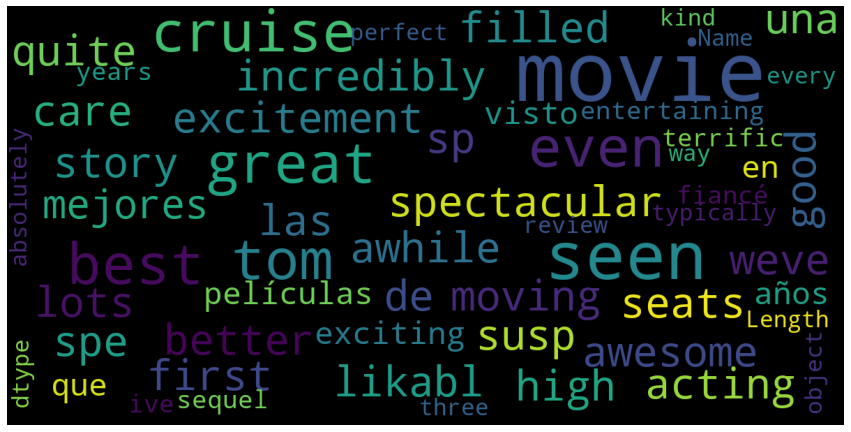

<Figure size 432x288 with 0 Axes>

In [60]:
show_wordcloud(data['review'])
plt.savefig('wordcloud')

In [42]:
data['review'].count().mean()

5010.0

In [26]:
# average count of words per reviews after cleaning
np.mean(data['review'].apply(lambda x:len(x.split())))

12.372255489021956

In [27]:
data['sentiment'].value_counts()

1    4822
0     188
Name: sentiment, dtype: int64

In [28]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')

In [30]:
vector=cv.fit_transform(data['review']).toarray()

In [31]:
vector

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [32]:
data.head()

,review,sentiment
0,even better first tom cruise incredibly likabl...,1
1,tom cruise awesome great movie spectacular spe...,1
2,care moving seats,1
3,great story good acting filled excitement susp...,1
4,best movie weve seen quite awhile lots high sp...,1


In [33]:
#cv.get_feature_names()

# LinearSVC

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x=data['review']
y=data['sentiment']

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [36]:
x_test.shape

(1002,)

In [37]:
x_train.dtype

dtype('O')

In [38]:
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

In [39]:
tfidf = TfidfVectorizer()

In [40]:
classifier = LinearSVC()

In [41]:
clf = Pipeline([('tfidf',tfidf), ('clf',classifier)])
# it will first do vectorization and then it will do classification

In [42]:
x_train.shape, x_test.shape

((4008,), (1002,))

In [43]:
clf.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [44]:
type(data.dtypes)

pandas.core.series.Series

In [45]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [46]:
y_pred = clf.predict(x_test)

In [47]:
confusion_matrix(y_test, y_pred)

array([[  7,  25],
       [  3, 967]], dtype=int64)

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.22      0.33        32
           1       0.97      1.00      0.99       970

    accuracy                           0.97      1002
   macro avg       0.84      0.61      0.66      1002
weighted avg       0.97      0.97      0.96      1002



In [49]:
accuracy_score(y_test, y_pred)

0.9720558882235529

In [50]:
clf.predict(["it was very good movie"])

array([1])

In [51]:
from imblearn.over_sampling import SMOTE

In [52]:
review_data_balanced = data.copy()

In [53]:
num = (review_data_balanced['sentiment'].value_counts()).max()
print(num )

4822


In [54]:
data_pos = review_data_balanced[review_data_balanced['sentiment'] == 1].sample(num, random_state=0,replace=True)
data_neg = review_data_balanced[review_data_balanced['sentiment'] == 0].sample(num,replace=True)
review_data_balanced = pd.concat([data_pos, data_neg], verify_integrity=False)
print(review_data_balanced['sentiment'].value_counts())

1    4822
0    4822
Name: sentiment, dtype: int64


In [55]:
review_data_balanced[review_data_balanced['sentiment']==0]

,review,sentiment
56,ridiculously cheesy predictable john hamm soul...,0
108,overhyped cheesy,0
662,special effects incredible theater effects mad...,0
4754,ok spectacular story dragged time time cinemat...,0
1376,give honest opinion movie saw 4d distracted un...,0
...,...,...
847,reading reviews watched movie quite disappoint...,0
3502,loud people close wish seat apart one another,0
4057,nothing movie good boring plot sucked,0
1376,give honest opinion movie saw 4d distracted un...,0


# MultinomialNB With SMOTE

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

count_vect = TfidfVectorizer(ngram_range=(1, 1), min_df=1,  max_df = 1000000) 
naive_bayes = MultinomialNB()  

pipeline1 = Pipeline(steps=[
        ('vectorizer', count_vect),
        ('nb', naive_bayes)])

parameters = {'nb__alpha': (0, 0.01, 0.05, 0.1, 0.3, 0.5, 1),
              }

# Perform CV (Cross-validation) together with grid search:
grid_search = GridSearchCV(pipeline1, parameters, n_jobs=-1, 
                           verbose=1, scoring = "accuracy", 
                           refit=True, cv=5)

X = review_data_balanced['review']
y = review_data_balanced['sentiment']

grid_search.fit(X,y)
grid_search.best_params_
grid_search.best_score_
print(grid_search.best_params_)
print(grid_search.best_score_)


Fitting 5 folds for each of 7 candidates, totalling 35 fits
{'nb__alpha': 0}
0.9744919755038299


C:\Users\dell\AppData\Roaming\Python\Python39\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


In [57]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [58]:
pipeline1.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer(max_df=1000000)),
                ('nb', MultinomialNB())])

In [59]:
y_pred=pipeline1.predict(X_test)

In [60]:
confusion_matrix(y_test, y_pred)

array([[1436,   27],
       [  64, 1367]], dtype=int64)

In [61]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1463
           1       0.98      0.96      0.97      1431

    accuracy                           0.97      2894
   macro avg       0.97      0.97      0.97      2894
weighted avg       0.97      0.97      0.97      2894



In [62]:
pipeline1.predict(['visuals amazing storyline old boring'])

array([0])

In [63]:
pipeline1.predict(['bad movie and booring'])

array([0])

In [64]:
pipeline1.predict(['really great movie edge seat'])

array([1])

# Logistic Regression

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

count_vect = TfidfVectorizer(ngram_range=(1, 1), min_df=1,  max_df = 1000000) 
log_reg = LogisticRegression()  

pipeline2 = Pipeline(steps=[
        ('vectorizer', count_vect),
        ('log', log_reg)])

parameters = {'log__penalty': ['l1','l2']
              }
# Perform CV (Cross-validation) together with grid search:
grid_search = GridSearchCV(pipeline2, parameters, n_jobs=-1, 
                           verbose=1, scoring = "accuracy", 
                           refit=True, cv=5)

X = review_data_balanced['review']
y = review_data_balanced['sentiment']


grid_search.fit(X,y)
grid_search.best_params_
grid_search.best_score_
print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


C:\Users\dell\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\dell\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dell\AppData\Roaming\Python\Python39\site-packages\sklearn\pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\dell\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py", line 1

{'log__penalty': 'l2'}
0.981750643702045


In [65]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [66]:
pipeline2.fit(X_train,y_train)


Pipeline(steps=[('vectorizer', TfidfVectorizer(max_df=1000000)),
                ('log', LogisticRegression())])

In [67]:
y_pred=pipeline2.predict(X_test)

In [68]:
confusion_matrix(y_test, y_pred)

array([[1458,    8],
       [  53, 1375]], dtype=int64)

In [69]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1466
           1       0.99      0.96      0.98      1428

    accuracy                           0.98      2894
   macro avg       0.98      0.98      0.98      2894
weighted avg       0.98      0.98      0.98      2894



In [70]:
pipeline2.predict(['visuals amazing storyline old boring'])

array([0])

In [71]:
pipeline2.predict(['bad movie and booring'])

array([0])

In [72]:
review_data_balanced['review'][10]

'really great movie edge seat'

In [73]:
pipeline2.predict(['really great movie edge seat'])

array([1])

In [74]:
review_data_balanced.sample(5)

,review,sentiment
3230,went see movie seeing audience score made acco...,0
1884,unrealistic boring,0
779,big fan first movie sure appreciate effort wen...,0
4536,movie new favorite movie loved,1
2871,someone died,0


In [75]:
data['review'][101]

'one best airforce movie ever seen awesome acting doubt good rooster looks real nice cast recommend everyone watch movie life'

In [76]:
pipeline2.predict(['one best airforce movie ever seen awesome acting doubt good rooster looks real nice cast recommend everyone watch movie life'])

array([1])

In [77]:
pipeline1.predict(['it was very bad experience in my life'])

array([0])

In [78]:
pipeline1.predict(['nonsense tom cruise latest ego trip work'])

array([0])

In [79]:
# We use MultinomialNB and Logestic Regression algorithm both are giving good prediction on our dataset but 
# MultinomialNB gives better result than other algorithms.

# roc_curve and roc_auc_score

In [95]:
pipeline1.predict_proba(X_test)

array([[0.18965133, 0.81034867],
       [0.10068756, 0.89931244],
       [0.4080981 , 0.5919019 ],
       ...,
       [0.05202598, 0.94797402],
       [0.90662825, 0.09337175],
       [0.81379648, 0.18620352]])

In [96]:
pipeline2.predict_proba(X_test)

array([[0.12735965, 0.87264035],
       [0.01254002, 0.98745998],
       [0.50755924, 0.49244076],
       ...,
       [0.0652212 , 0.9347788 ],
       [0.81265535, 0.18734465],
       [0.88009883, 0.11990117]])

In [80]:
y_pred_proba1=pipeline1.predict_proba(X_test)
y_pred_proba2=pipeline2.predict_proba(X_test)

In [82]:
from sklearn.metrics import roc_auc_score,roc_curve

In [83]:
# roc_curve for model
fpr1,tpr1,thresh1 =roc_curve(y_test,y_pred_proba1[:,1],pos_label=1)
fpr2,tpr2,thresh2 =roc_curve(y_test,y_pred_proba2[:,1],pos_label=1)

In [84]:
# roc_curve for fpr=tpr
random_probs=[0 for i in range (len(y_test))]
p_fpr,p_tpr,_ =roc_curve(y_test,random_probs,pos_label=1)

In [85]:
roc_curve1=roc_auc_score(y_test,y_pred_proba1[:,1])
roc_curve2=roc_auc_score(y_test,y_pred_proba2[:,1])

In [86]:
print(roc_curve1,roc_curve2)

0.9963863444422789 0.996645725138623


In [88]:
import matplotlib.pyplot as plt 

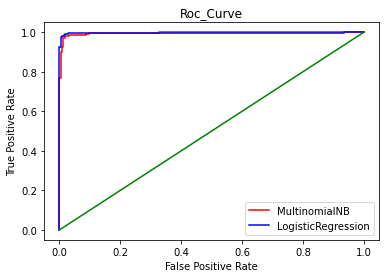

In [93]:
plt.plot(fpr1,tpr1,color='red',label='MultinomialNB')
plt.plot(fpr2,tpr2,color='blue',label='LogisticRegression')
plt.plot(p_fpr,p_tpr,color='green')

plt.title('Roc_Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.savefig('Roc_Curve For Model')